In [23]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


Add Caffe to path to be able to import it, but why is it working in shells?

In [2]:
caffe_root = '/opt/caffe/'
import sys
sys.path.insert(0, caffe_root + 'python')

In [26]:
import tracking.recurrent_cnn as rc
import animator
import IPython.display
import numpy

Populate with configuration values

In [4]:
parser = rc.build_parser()
args = parser.parse_args(['--batch_size', '2'])
globals().update(vars(args))
conv_output_dim = conv_nr_filters*conv_filter_row*conv_filter_col
gru_input_dim = conv_output_dim+4

Create objects

In [6]:
net, transform = rc.setup(batch_size, seq_len, img_row, img_col)
train, tester, params = rc.build(batch_size, gru_input_dim, gru_dim, conv_output_dim, zero_tail_fc, test)

Creating Net object
Creating Transformer
Reshaping input from (10, 3, 224, 224) to (120, 3, 224, 224)
Building network
Initializing parameters
Building optimizer


Create data generator

In [ ]:
generator = rc.GG.GaussianGenerator(dataDir=dataDir, seqLength=seq_len, imageSize=img_row, grayscale=False)

In [13]:
%time data, label = generator.getBatch(batch_size)

@TrajectorySimulator: New simulation with scene /home/datasets/datasets1/mscoco/images/train2014/COCO_train2014_000000011826.jpg and object /home/datasets/datasets1/mscoco/images/train2014/COCO_train2014_000000250067.jpg
@TrajectorySimulator: New simulation with scene /home/datasets/datasets1/mscoco/images/train2014/COCO_train2014_000000011826.jpg and object /home/datasets/datasets1/mscoco/images/train2014/COCO_train2014_000000250067.jpg
CPU times: user 1.08 s, sys: 1.4 s, total: 2.48 s
Wall time: 876 ms


Show first generated sequence

In [22]:
output = '/tmp/simulation.mp4'
%time animator.frames2video(data[0].astype(numpy.uint8), 30, output, piped=False)
videoSrc = 'data:video/mp4;base64,' + open(output, 'rb').read().encode('base64')
videoTag = '<video controls autoplay width="320" height="240"><source src="{0}" type="video/mp4">Unsupported tag</video>'
IPython.display.HTML(videoTag.format(videoSrc))

CPU times: user 199 ms, sys: 10.4 ms, total: 209 ms
Wall time: 513 ms


Verify a sample image after reshaping for Caffe batch

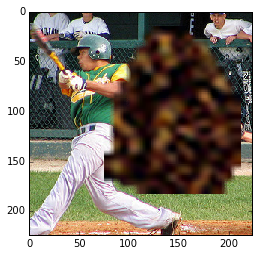

In [24]:
imshow(data.reshape(-1, data.shape[-3], data.shape[-2], data.shape[-1])[0].astype(numpy.uint8))

In [27]:
data /= 255.0
label = label / (img_row / 2.) - 1.
%time out, activations = rc.forward(net, transform, data.reshape(-1, data.shape[-3], data.shape[-2], data.shape[-1]))
%time activations = activations.reshape(batch_size, seq_len, activations.shape[-3], activations.shape[-2], activations.shape[-1])
%time cost, bbox_seq = train(seq_len, activations, label[:, 0, :], label)

Forwarding images with shape (120, 224, 224, 3)
CPU times: user 236 ms, sys: 988 ms, total: 1.22 s
Wall time: 1.23 s
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 11.9 µs
CPU times: user 456 ms, sys: 42.2 ms, total: 498 ms
Wall time: 499 ms


Show a sample channel activation

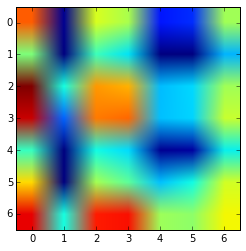

In [41]:
imshow(activations[0,0,100])#.astype(numpy.uint8))